##  回归分析

In [1]:
# 导入库
import pandas as pd
import numpy as np
from sklearn.linear_model import BayesianRidge, ElasticNet# 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from xgboost import XGBRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
mean_squared_error, r2_score  # 批量导入指标算法
import matplotlib.pyplot as plt  # 导入图形展示库

E:\anaconda\envs\huang\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
# 数据准备
raw_data = np.loadtxt('data.txt')  # 读取数据文件
X_raw,y = raw_data[2:, :-1],raw_data[2:, -1]  # 分割自变量,因变量
model_ss = StandardScaler()
X = model_ss.fit_transform(X_raw)

In [13]:
print(y)

[12.95 12.07 12.37 12.08 12.1  11.93 11.9  11.95 12.14 12.1  12.09 12.4
 12.29 12.41 12.86 13.38 14.03 14.64]


In [14]:
# 拆分数据集
num = int(X.shape[0]*0.7)
X_train,X_test = X[:,:],X[:,:] # 拆分训练集和测试集
y_train,y_test = y[:],y[:] # 拆分训练集和测试集
print(y_test)

[12.95 12.07 12.37 12.08 12.1  11.93 11.9  11.95 12.14 12.1  12.09 12.4
 12.29 12.41 12.86 13.38 14.03 14.64]


In [15]:
# 初选回归模型
n_folds = 5  # 设置交叉检验的次数
model_names = ['BayesianRidge', 'XGBR', 'ElasticNet', 'SVR','GBR']  # 不同模型的名称列表
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_xgbr = XGBRegressor(random_state=0)  # 建立XGBR对象
model_etc = ElasticNet(random_state=0)  # 建立弹性网络回归模型对象
model_svr = SVR(gamma='scale')  # 建立支持向量机回归模型对象
model_gbr = GradientBoostingRegressor(random_state=0)  # 建立梯度增强回归模型对象
model_list = [model_br, model_xgbr, model_etc,model_svr, model_gbr]  # 不同回归模型对象的集合
pre_y_list = [model.fit(X_train, y_train).predict(X_test) for model in model_list]  # 各个回归模型预测的y值列表

print(pre_y_list)

[16:12:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[array([12.7086019 , 12.42181101, 12.28157471, 12.10064912, 11.95535715,
       12.06404028, 11.95689786, 11.98922233, 11.88401575, 11.93618944,
       12.26647312, 12.42192015, 12.46872401, 12.57039641, 12.79693691,
       13.63625283, 13.95753609, 14.27340092]), array([12.921104 , 12.075055 , 12.3634205, 12.0859585, 12.092663 ,
       11.930855 , 11.916838 , 11.970253 , 12.113328 , 12.095135 ,
       12.104235 , 12.370993 , 12.312968 , 12.410732 , 12.86417  ,
       13.369465 , 14.016539 , 14.585446 ], dtype=float32), array([12.5017658 , 12.50000272, 12.50000272, 12.49941503, 12.50059041,
       12.51822119, 12.52233504, 12.52703658, 12.52997504, 12.53467658,
       12.54760582, 12.55407043, 12.5570089 , 12.55759659, 12.56112274,
       12.58991968, 12.59285814, 12.5957966 ]), array([12.74319433, 12.50774245, 12.27004779, 

E:\anaconda\envs\huang\lib\site-packages\xgboost\core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [16]:
# 模型效果评估
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_functions = [explained_variance_score, mean_absolute_error, mean_squared_error,r2_score]  # 回归评估指标对象集
model_metrics_list = [[m(y_test, pre_y_list[i]) for m in model_metrics_functions] for i in range(len(model_list))]  # 回归评估指标列表

#print(model_metrics_list)
regresstion_score = pd.DataFrame(model_metrics_list, index=model_names,
                   columns=['explained_variance', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print('all samples: %d \t features: %d' % (n_samples, n_features),'\n','-'*60)  # 打印输出样本量和特征数量
print('\n','regression metrics:','\n','-'*60)  # 打印输出标题
print(regresstion_score)  # 打印输出回归指标的数据框

all samples: 18 	 features: 12 
 ------------------------------------------------------------

 regression metrics: 
 ------------------------------------------------------------
               explained_variance       mae           mse        r2
BayesianRidge            0.937797  0.155154  3.471646e-02  0.937797
XGBR                     0.999321  0.015165  4.044690e-04  0.999275
ElasticNet               0.061291  0.557615  5.239065e-01  0.061291
SVR                      0.837058  0.186094  9.318694e-02  0.833032
GBR                      1.000000  0.000364  1.809894e-07  1.000000


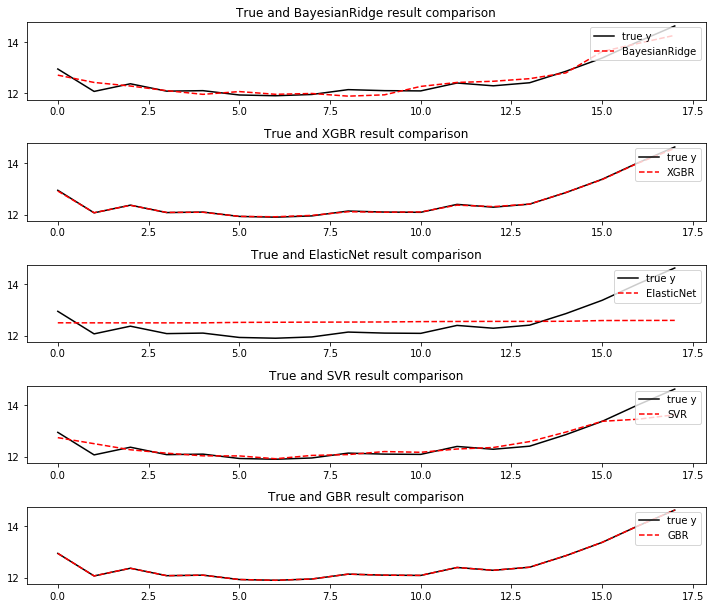

In [17]:
# 模型效果可视化
plt.figure(figsize=(10, 10))  # 创建画布
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.subplot(len(pre_y_list)+1,1,i+1)
    plt.plot(np.arange(len(y_test)), y_test, color='k', label='true y')  # 画出原始值的曲线
    plt.plot(np.arange(len(y_test)), pre_y_list[i], '#FF0000',linestyle='--', label=model_names[i])  # 画出每条预测结果线
    plt.title('True and {} result comparison'.format(model_names[i]))  # 标题
    plt.legend(loc='upper right')  # 图例位置
    plt.tight_layout() # 自动调整子图间隔

In [18]:
# 模型model_xgbr应用
print('regression prediction','\n','-'*40)
new_point_set = [[39251,25378,106.4,102.1,22.9,16.8,305008.13,461350000,840.41,39.7,0.596,8544.11],
                 [36396,23070,107.3,101.6,22.6,15.9,278099.24,425620069,794.03,39.9,0.585,7614]]  # 要预测的新数据集

true_list = [10.94,12.43]
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    x_matrix = np.array(new_point).reshape(1, -1)
    x_scaled = model_ss.transform(x_matrix)
    new_pre_y = model_xgbr.predict(x_scaled)  # 使用XGBR进行预测
    print('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息
    print("true scar: %.2f" % true_list[i])

regression prediction 
 ----------------------------------------
predict for new point 1 is:  12.76
true scar: 10.94
predict for new point 2 is:  12.84
true scar: 12.43


In [19]:
# 模型model_gbr应用
print('regression prediction','\n','-'*40)
new_point_set = [[39251,25378,106.4,102.1,22.9,16.8,305008.13,461350000,840.41,39.7,0.596,8544.11],
                 [36396,23070,107.3,101.6,22.6,15.9,278099.24,425620069,794.03,39.9,0.585,7614]]  # 要预测的新数据集

true_list = [10.94,12.43]
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    x_matrix = np.array(new_point).reshape(1, -1)
    x_scaled = model_ss.transform(x_matrix)
    new_pre_y = model_gbr.predict(x_scaled)  # 使用GBR进行预测
    print('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息
    print("true scar: %.2f" % true_list[i])

regression prediction 
 ----------------------------------------
predict for new point 1 is:  12.85
true scar: 10.94
predict for new point 2 is:  12.84
true scar: 12.43


In [20]:
# 模型model_br应用
print('regression prediction','\n','-'*40)
new_point_set = [[39251,25378,106.4,102.1,22.9,16.8,305008.13,461350000,840.41,39.7,0.596,8544.11],
                 [36396,23070,107.3,101.6,22.6,15.9,278099.24,425620069,794.03,39.9,0.585,7614]]  # 要预测的新数据集

true_list = [10.94,12.43]
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    x_matrix = np.array(new_point).reshape(1, -1)
    x_scaled = model_ss.transform(x_matrix)
    new_pre_y = model_br.predict(x_scaled)  # 使用GBR进行预测
    print('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息
    print("true scar: %.2f" % true_list[i])

regression prediction 
 ----------------------------------------
predict for new point 1 is:  13.60
true scar: 10.94
predict for new point 2 is:  13.12
true scar: 12.43


In [23]:
# 模型model_etc应用
print('regression prediction','\n','-'*40)
new_point_set = [[39251,25378,106.4,102.1,22.9,16.8,305008.13,461350000,840.41,39.7,0.596,8544.11],
                 [36396,23070,107.3,101.6,22.6,15.9,278099.24,425620069,794.03,39.9,0.585,7614]]  # 要预测的新数据集

true_list = [10.94,12.43]
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    x_matrix = np.array(new_point).reshape(1, -1)
    x_scaled = model_ss.transform(x_matrix)
    new_pre_y = model_etc.predict(x_scaled)  # 使用GBR进行预测
    print('predict for new point %d is:  %.3f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息
    print("true scar: %.3f" % true_list[i])

regression prediction 
 ----------------------------------------
predict for new point 1 is:  12.504
true scar: 10.940
predict for new point 2 is:  12.502
true scar: 12.430


In [24]:
# 模型model_svr应用
print('regression prediction','\n','-'*40)
new_point_set = [[39251,25378,106.4,102.1,22.9,16.8,305008.13,461350000,840.41,39.7,0.596,8544.11],
                 [36396,23070,107.3,101.6,22.6,15.9,278099.24,425620069,794.03,39.9,0.585,7614]]  # 要预测的新数据集

true_list = [10.94,12.43]
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    x_matrix = np.array(new_point).reshape(1, -1)
    x_scaled = model_ss.transform(x_matrix)
    new_pre_y = model_svr.predict(x_scaled)  # 使用GBR进行预测
    print('predict for new point %d is:  %.3f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息
    print("true scar: %.3f" % true_list[i])

regression prediction 
 ----------------------------------------
predict for new point 1 is:  12.882
true scar: 10.940
predict for new point 2 is:  12.840
true scar: 12.430
